In [73]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

def plot_experiment(path, title='Experiment _'):
    # Read the Excel file
    df = pd.read_excel(path, skiprows=range(0, 4))
    df.columns = df.columns.str.strip()
    df.rename(columns={'Time （s）': 'Time (s)'}, inplace=True)
    print(df.columns)
    
    df['Power (W)'] = df['Voltage  (V)'] * df['Current  (A)']

    # Print the first few rows of the dataframe to understand its structure
    print("Data from Excel file:")
    print(df.head())

    # Plotting the data
    df.plot(kind='line', x=df.columns[0], y=df.columns[1:])

    # Customize the plot
    plt.title(title)
    plt.xlabel(df.columns[0])
    plt.ylabel('Values')
    plt.grid(True, axis='y')
    plt.legend(title='Legend')

    # Show the plot
    plt.show()

Index(['Time (s)', 'Voltage  (V)', 'Current  (A)'], dtype='object')
Data from Excel file:
   Time (s)  Voltage  (V)  Current  (A)  Power (W)
0         0        5.1282       0.50294   2.579177
1         1        5.1279       0.56041   2.873726
2         2        5.1279       0.54618   2.800756
3         3        5.1280       0.54715   2.805785
4         4        5.1281       0.50151   2.571793


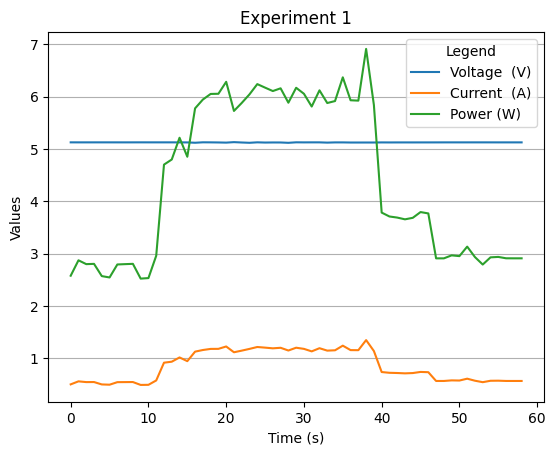

In [74]:
plot_experiment('data/TC66C-exp1.xlsx', title='Experiment 1')

Index(['Time (s)', 'Voltage  (V)', 'Current  (A)'], dtype='object')
Data from Excel file:
   Time (s)  Voltage  (V)  Current  (A)  Power (W)
0         0        5.1286       0.50527   2.591328
1         1        5.1284       0.59373   3.044885
2         2        5.1284       0.55633   2.853083
3         3        5.1281       0.55286   2.835121
4         4        5.1283       0.49831   2.555483


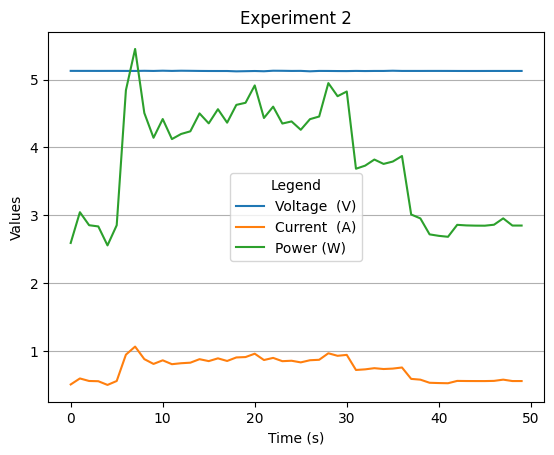

In [75]:
plot_experiment('data/TC66C-exp2.xlsx', title='Experiment 2')

Index(['Time (s)', 'Voltage  (V)', 'Current  (A)'], dtype='object')
Data from Excel file:
   Time (s)  Voltage  (V)  Current  (A)  Power (W)
0         0        5.1274       0.70503   3.614971
1         1        5.1298       0.55680   2.856273
2         2        5.1298       0.50492   2.590139
3         3        5.1279       0.55482   2.845061
4         4        5.1277       0.55553   2.848591


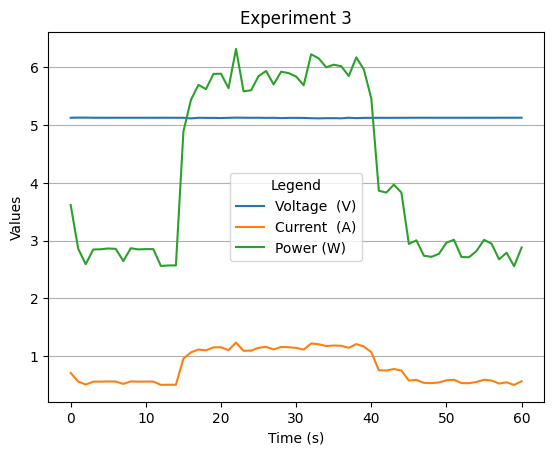

In [76]:
plot_experiment('data/TC66C-exp3.xlsx', title='Experiment 3')

   Experiment 1  Experiment 2  Experiment 3
0           NaN           NaN      3.614971
1           NaN           NaN      2.856273
2      2.579177           NaN      2.590139
3      2.873726           NaN      2.845061
4      2.800756           NaN      2.848591


<Figure size 100x500 with 0 Axes>

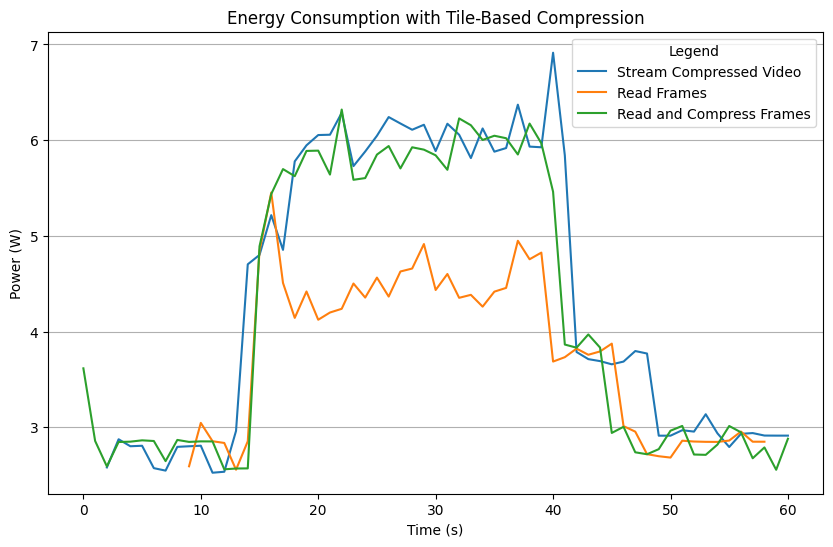

In [99]:
data_frames = []
files = ['data/TC66C-exp1.xlsx', 'data/TC66C-exp2.xlsx', 'data/TC66C-exp3.xlsx']

for i, file in enumerate(files, start=1):
    data_frames.append(pd.read_excel(file, skiprows=range(0, 4)))
    cur_df = data_frames[-1]
    cur_df.columns = data_frames[-1].columns.str.strip()
    cur_df[f'Experiment {i}'] = cur_df['Voltage  (V)'] * cur_df['Current  (A)']
    cur_df.drop(columns=['Time （s）', 'Voltage  (V)', 'Current  (A)'], inplace=True)

df = pd.concat(data_frames, axis=1)

# Align experiment starting points
df['Experiment 1'] = df['Experiment 1'].shift(2)
df['Experiment 2'] = df['Experiment 2'].shift(9)
print(df.head())

df.rename(columns={
    'Experiment 1': 'Stream Compressed Video',
    'Experiment 2': 'Read Frames',
    'Experiment 3': 'Read and Compress Frames'
}, inplace=True)

myfig = plt.figure(figsize=(1, 5))
df.plot(kind='line', y=df.columns, figsize=(10, 6))

# Customize the plot
plt.title('Energy Consumption with Tile-Based Compression')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.grid(True, axis='y')
plt.legend(title='Legend')

# Show the plot
plt.show()